In [2]:
#importing required library
from fastai import *
from fastai.vision.all import *
from fastai.vision.core import *
from fastai.vision.widgets import *
from fastai.metrics import error_rate
import pandas as pd
import numpy as np

In [3]:
#initilizing testing datast path in path variable
path ='/home/rt/SOCOFing/Altered'   # this path if you use colab notebook replace it if the dateset in your system

In [4]:
#loading training and validation images asd split ratio in 0.2 or 20 percentage
data = ImageDataLoaders.from_folder(
    path,
    train='.',
    valid_pct=0.2,
    seed =42,
    item_tfms=Resize(224)

)

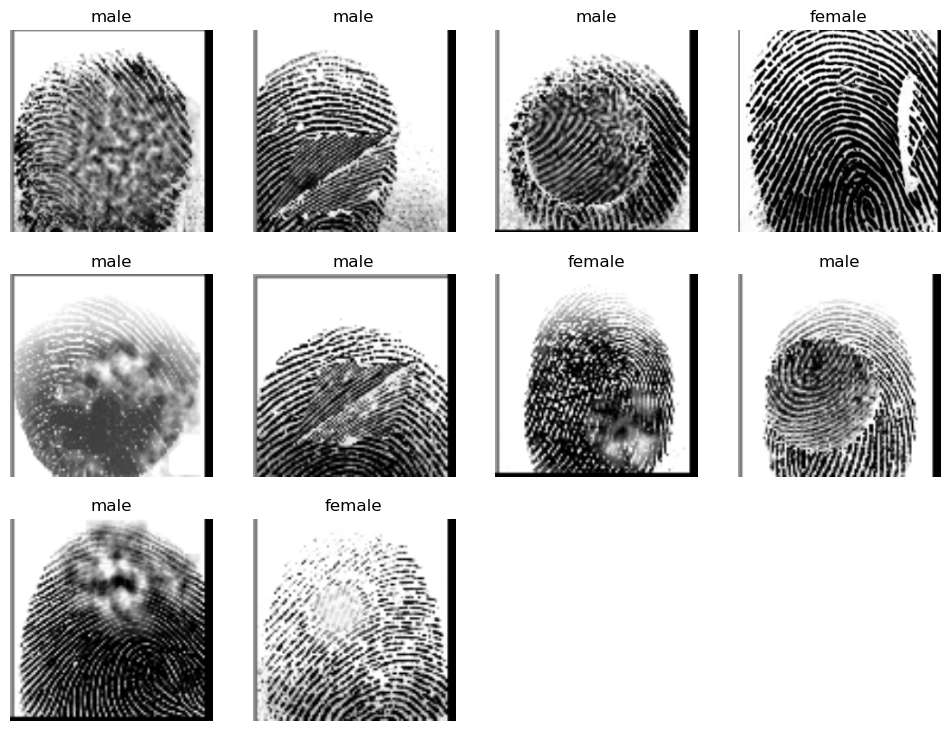

In [5]:
#showing 10 images from dataset
data.show_batch(max_n=10)

In [6]:
#loading pretrained Resnet50 model
learn = vision_learner(data, models.resnet50, metrics= [accuracy], model_dir=Path('path'), path=Path("."))

SuggestedLRs(valley=0.0012022644514217973)

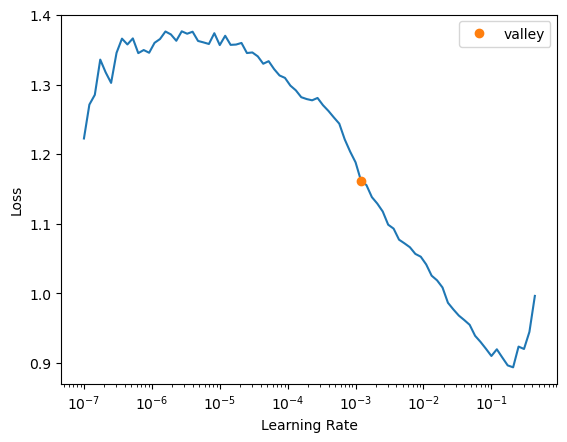

In [7]:
#finding learning rate using learn.lr_find() function
learn.lr_find()

In [8]:
#training the model between tow learning rate lr1 and lr2 with 10 epoch
lr1 = 1e-3
lr2 = 1e-1

learn.fit_one_cycle(4,slice(lr1,lr2))

epoch,train_loss,valid_loss,accuracy,time
0,0.381173,0.725112,0.919410,37:40
1,0.214970,0.140933,0.983696,40:11
2,0.063023,0.054481,0.988509,41:02
3,0.033439,0.033143,0.987888,39:00


In [9]:
interpreat = ClassificationInterpretation.from_learner(learn)

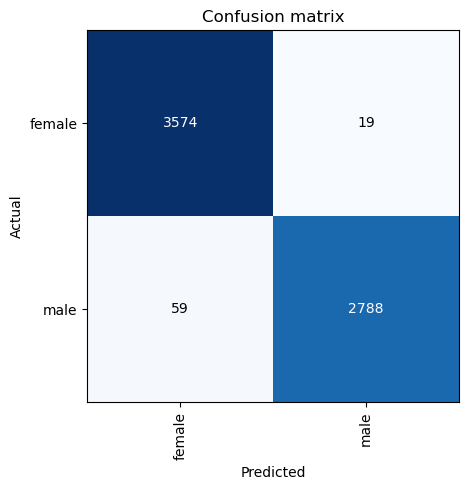

In [10]:
interpreat.plot_confusion_matrix()

In [11]:
# Save the trained model
learn.export('fingerprint2.pkl')


/home/rt/anaconda3/lib/python3.12/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


Predicted: male, Confidence: 0.9998


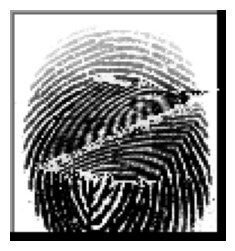

In [1]:

# Load the trained model for inference
from fastai.vision.all import load_learner, PILImage

learn_inf = load_learner('fingerprint2.pkl')

# Example prediction on a test image
img = PILImage.create('/home/rt/SOCOFing/Altered/male/1__M_Left_index_finger_Zcut.BMP')  # Replace with actual image path
img.show()
pred_class, pred_idx, outputs = learn_inf.predict(img)
print(f"Predicted: {pred_class}, Confidence: {outputs[pred_idx]:.4f}")
